In [2]:
# 1 + 1.1 
import threading
import random
import time
import numpy as np


def multiply_vectors(v1, v2):
    return sum([v1[i] * v2[i] for i in range(len(v1))])

def multiply_matrix(start_row, end_row):
    for i in range(start_row, end_row):
        for j in range(k):
            thread_num = threading.get_ident()
            C[i][j] = multiply_vectors(A[i], [B[x][j] for x in range(m)])
            print(f"Thread {thread_num} , [{i},{j}]={C[i][j]} ")    
            time.sleep(random.uniform(0.1, 0.9))


n = int(input('n: '))
m = int(input('m: '))
k = int(input('k: '))
A = [[i+j for j in range(m)] for i in range(n)]
B = [[i+j for j in range(k)] for i in range(m)]
C = [[0 for j in range(k)] for i in range(n)]

   
#     num_threads = int(input('number of threads to use: '))
num_threads = n*k

threads = []

for i in range(num_threads):
    start_row = i * len(C) // num_threads
    end_row = (i + 1) * len(C) // num_threads
    thread = threading.Thread(target=multiply_matrix, args=(start_row, end_row))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()
        
print('end :)')

n: 5
m: 5
k: 5
Thread 12448 , [0,0]=30 
Thread 13384 , [1,0]=40 
Thread 6988 , [2,0]=50 
Thread 11824 , [3,0]=60 
Thread 14352 , [4,0]=70 
Thread 6988 , [2,1]=70 
Thread 13384 , [1,1]=55 
Thread 14352 , [4,1]=100 
Thread 12448 , [0,1]=40 
Thread 11824 , [3,1]=85 
Thread 13384 , [1,2]=70 
Thread 6988 , [2,2]=90 
Thread 12448 , [0,2]=50 
Thread 11824 , [3,2]=110 
Thread 14352 , [4,2]=130 
Thread 13384 , [1,3]=85 
Thread 6988 , [2,3]=110 
Thread 14352 , [4,3]=160 
Thread 12448 , [0,3]=60 
Thread 13384 , [1,4]=100 
Thread 11824 , [3,3]=135 
Thread 6988 , [2,4]=130 
Thread 14352 , [4,4]=190 
Thread 11824 , [3,4]=160 
Thread 12448 , [0,4]=70 
end :)


In [3]:
print(A)
print(B)
print(C)

[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8]]
[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8]]
[[30, 40, 50, 60, 70], [40, 55, 70, 85, 100], [50, 70, 90, 110, 130], [60, 85, 110, 135, 160], [70, 100, 130, 160, 190]]


In [4]:
print(np.dot(A,B))

[[ 30  40  50  60  70]
 [ 40  55  70  85 100]
 [ 50  70  90 110 130]
 [ 60  85 110 135 160]
 [ 70 100 130 160 190]]


In [8]:
# 1.2
import threading
import random
import time
import numpy as np


def multiply_vectors(v1, v2):
    return sum([v1[i] * v2[i] for i in range(len(v1))])


def multiply_matrix(start_row, end_row):
    for i in range(start_row, end_row):
        for j in range(k):
            C[i][j] = multiply_vectors(A[i], [B[x][j] for x in range(m)])


if __name__ == '__main__':

    n = int(input('n:'))
    m = int(input('m:'))
    k = int(input('k:'))
    A = [[10000*i+j*1000 for j in range(m)] for i in range(n)]
    B = [[1000*i+j*1000 for j in range(k)] for i in range(m)]
    C = [[0 for j in range(k)] for i in range(n)]
    
    times = []

    num_threads = [i for i in range(1,n*k)]

    for t in num_threads:
        threads = []

        start_time = time.time()

        for i in range(t):
            start_row = i * len(C) // t
            end_row = (i + 1) * len(C) // t
            thread = threading.Thread(target=multiply_matrix, args=(start_row, end_row))
            thread.start()
            threads.append(thread)

        for thread in threads:
            thread.join()

        end_time = time.time()
        
        times.append([t,end_time - start_time])
        print(f"Execution time for {t} threads: {end_time - start_time} seconds")


n:15
m:10
k:15
Execution time for 1 threads: 0.008007287979125977 seconds
Execution time for 2 threads: 0.007990598678588867 seconds
Execution time for 3 threads: 0.008017301559448242 seconds
Execution time for 4 threads: 0.01599860191345215 seconds
Execution time for 5 threads: 0.007982969284057617 seconds
Execution time for 6 threads: 0.015998363494873047 seconds
Execution time for 7 threads: 0.008082151412963867 seconds
Execution time for 8 threads: 0.015931367874145508 seconds
Execution time for 9 threads: 0.01206350326538086 seconds
Execution time for 10 threads: 0.008038997650146484 seconds
Execution time for 11 threads: 0.017439842224121094 seconds
Execution time for 12 threads: 0.009551286697387695 seconds
Execution time for 13 threads: 0.00901937484741211 seconds
Execution time for 14 threads: 0.008026838302612305 seconds
Execution time for 15 threads: 0.015995264053344727 seconds
Execution time for 16 threads: 0.016058683395385742 seconds
Execution time for 17 threads: 0.0159

In [9]:
min_t = min(times, key=lambda x: x[1])
print(min_t)

[50, 0.007960081100463867]


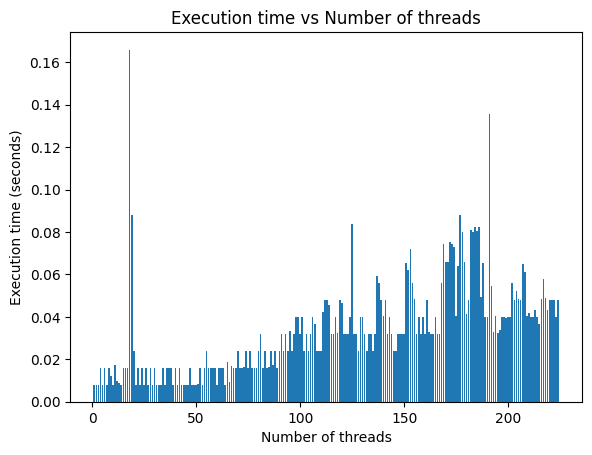

In [10]:
import matplotlib.pyplot as plt


keys = [i[0] for i in times]
values = [i[1] for i in times]

fig, ax = plt.subplots()

plt.subplots_adjust(left=0.1, right=0.9)

plt.bar(keys, values)

plt.ylabel('Execution time (seconds)')
plt.xlabel('Number of threads')
plt.title('Execution time vs Number of threads')

plt.show()


In [11]:
# 2 + 2.1 a
import threading
import time

v = 0
lock = threading.Lock()

def increment():
    global v
    for i in range(100000000):
        with lock:
            v += 1

start_time = time.time()

t1 = threading.Thread(target=increment)
t2 = threading.Thread(target=increment)

t1.start()
t2.start()

t1.join()
t2.join()

end_time = time.time()

print("v: ",v)
print(f"Виконання з lock: {end_time - start_time:.5f} секунд")


v:  200000000
Виконання з lock: 178.08409 секунд


In [12]:
# 2 + 2.1 б
import threading
import time

v = 0

def increment():
    global v
    for i in range(100000000):
        v += 1

start_time = time.time()

t1 = threading.Thread(target=increment)
t2 = threading.Thread(target=increment)

t1.start()
t2.start()

t1.join()
t2.join()

end_time = time.time()

print("v: ",v)
print(f"Виконання без lock: {end_time - start_time:.5f} секунд")


v:  200000000
Виконання без lock: 42.94609 секунд


In [13]:
# 2.3
import threading
import time

value = 0
n = 10

lock = threading.Lock()
condition = threading.Condition(lock)

def thread1():
    global value
    global n
    while value < n-1:
        with lock:
            while value % 2 == 1:
                condition.wait()
            value += 1
            print(f"{threading.current_thread().name} : {value}")
            condition.notify_all()

def thread2():
    global value
    global n
    while value < n:
        with lock:
            while value % 2 == 0:
                condition.wait()
            value += 1
            print(f"{threading.current_thread().name} : {value}")
            condition.notify_all()

start_time = time.time()

t1 = threading.Thread(target=thread1)
t2 = threading.Thread(target=thread2)
t1.start()
t2.start()
t1.join()
t2.join()

end_time = time.time()

print("Value is now:", value)
print(f"Час виконання: {end_time - start_time:.5f} секунд")


Thread-180834 (thread1) : 1
Thread-180835 (thread2) : 2
Thread-180834 (thread1) : 3
Thread-180835 (thread2) : 4
Thread-180834 (thread1) : 5
Thread-180835 (thread2) : 6
Thread-180834 (thread1) : 7
Thread-180835 (thread2) : 8
Thread-180834 (thread1) : 9
Thread-180835 (thread2) : 10
Value is now: 10
Час виконання: 0.00977 секунд
